In [1]:
import load_faces
from sklearn import datasets, neighbors, linear_model
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

faces = load_faces.fetch_faces('/notebook/faces', resize = 250, color = False, 
                               slice_ = (slice(0,250), slice(0,210)))

['Daniel Zhang' 'Sophia Wang' 'sean xie']
Number of test images: 30
Correctly predicted images: 29
Prediction Accuracy: 0.966666666667


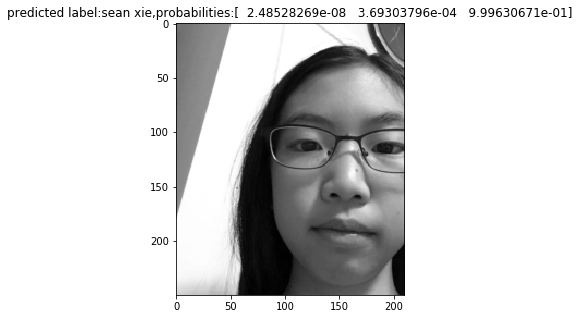

In [2]:
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

X = faces.data
y = faces.target
print faces.target_names

n_samples = len(X)

training_data_stop_index = int(.90 * n_samples)

X_train = X[:training_data_stop_index]
y_train = y[:training_data_stop_index]
X_test = X[training_data_stop_index:]
y_test = y[training_data_stop_index:]

model = LogisticRegression()

model.fit(X_train, y_train)
predicted_labels = model.predict(X_test)
probabilities = model.predict_proba(X_test)

print 'Number of test images:', len(X_test)
print 'Correctly predicted images:', sum(y_test == predicted_labels)
print 'Prediction Accuracy:', accuracy_score(y_test, predicted_labels)

for (index, im) in enumerate(faces.images[training_data_stop_index:]):
    prediction = predicted_labels[index]
    true_label = y_test[index]
    if prediction != true_label:
        plt.figure(figsize=(5, 5))
        plt.imshow(im, cmap=plt.cm.gray)
        plt.title('predicted label:' + faces.target_names[predicted_labels[index]] + ',' +
                 'probabilities:' + str(probabilities[index]))
        plt.grid(False)

import pickle

output = open('names.pkl', 'wb')
pickle.dump(faces.target_names, output)
output.close()


In [3]:
import pickle

output = open('data.pkl', 'wb')
pickle.dump(model, output)
output.close()


In [4]:
def predict_face(img):
    import load_faces
    import pickle

    some_face = load_faces.load_one_face(img, resize = 250, color = False, 
                                         slice_=(slice(0, 250), slice(0, 210)))
    print some_face.shape

    pkl_file = open('data.pkl', 'rb')
    face_model = pickle.load(pkl_file)
    pkl_file.close()

    names_file = open('names.pkl', 'rb')
    target_names = pickle.load(names_file)
    names_file.close()
 
    predicted_label = face_model.predict([some_face.flatten()])[0]

    return target_names[predicted_label]

print predict_face('/notebook/faces/Sophia_Wang/IMG_1565.jpg')

(250, 210)
Sophia Wang


[[ 50  51 553 553]]
[[168 194 109 109]
 [358 170 145 145]
 [211 454 103 103]]
[[381 189 117 117]
 [169 180 130 130]
 [294 402 122 122]]


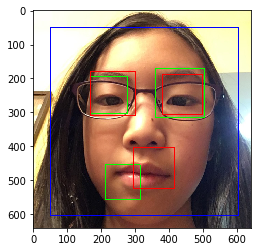

In [5]:
import cv2
img = cv2.imread('/notebook/faces/Sophia_Wang/IMG_1560.jpg')
#gray = faces.images[200]
#gray = np.array(gray, dtype='uint8')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

face_cascade1 = cv2.CascadeClassifier('haarcascade_frontalface_alt.xml')
face_cascade2 = cv2.CascadeClassifier('haarcascade_lefteye_2splits.xml')
face_cascade3 = cv2.CascadeClassifier('haarcascade_righteye_2splits.xml')

faces2 = face_cascade1.detectMultiScale(gray, scaleFactor=1.01,
    minNeighbors=1,
    minSize=(500, 500),
    flags = cv2.CASCADE_SCALE_IMAGE
)
faces3 = face_cascade2.detectMultiScale(gray, scaleFactor=1.01,
    minNeighbors=1,
    minSize=(100, 100),
    flags = cv2.CASCADE_SCALE_IMAGE
)
faces4 = face_cascade3.detectMultiScale(gray, scaleFactor=1.01,
    minNeighbors=1,
    minSize=(100, 100),
    flags = cv2.CASCADE_SCALE_IMAGE
)
print faces2
print faces3
print faces4
for (x,y,w,h) in faces2:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
for (x,y,w,h) in faces3:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
for (x,y,w,h) in faces4:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    
#plt.imshow(gray, cmap=plt.cm.gray) 
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 

In [9]:
% matplotlib inline

import requests
import PIL
from matplotlib import pyplot as plt

url = 'http://192.168.1.129:5050/whoisit'
files = {'photo': open('/notebook/faces/Sophia_Wang/IMG_1565.jpg', 'rb')}
response = requests.post(url, files=files)
print response
print response.json()

<Response [200]>
{u'predicted_face': u'Sophia Wang'}
